<h1>Bissl Rumgeteste mit den Daten. Irrelevant für das Projekt, aber zu schade zum löschen</h1>

<h2>Setup</h2>

In [78]:
import pandas as pd
import streamlit as st
import sklearn as sk
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tsfresh
import pickle
import math
import os

In [79]:
path = r"C:\Users\ReneJ\Desktop\Data"

<h2>Testsachen mit Lichtsensor und Bildschirmhelligkeit</h2>

In [80]:
#CSVs einlesen und DataFrames bauen. Weirde Spalten löschen und ne richtige Zeite Spalte hinzufügen

light = pd.read_csv(path+ r"\2023-04-22_08-09-30\Light.csv")
displayB = pd.read_csv(path + r"\2023-04-22_08-09-30\Brightness.csv")
battery = pd.read_csv(path + r"\2023-04-22_08-09-30\Battery.csv")
location = pd.read_csv(path + r"\2023-04-22_08-09-30\Location.csv")

dfs =[light, displayB, battery, location]

light["Time"] = pd.to_datetime(light['time'], unit = 'ns')
light.drop(columns=["time", "seconds_elapsed"])

displayB["Time"] = pd.to_datetime(displayB["time"], unit = 'ns')
displayB.drop(columns=["time", "seconds_elapsed"])

battery["Time"] = pd.to_datetime(battery['time'], unit = 'ns')
battery.drop(columns=["time", "seconds_elapsed"])

location["Time"] = pd.to_datetime(location['time'], unit = 'ns')
location.drop(columns=["time", "seconds_elapsed"])

type(location["Time"][0])
location["Time"][0].to_pydatetime()


for df in dfs:
    df["Readable_Time"] = df["Time"]
    for i in range(0,len(df["Time"])):
        df["Readable_Time"][i] = df["Time"][i].to_pydatetime()

light


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ReneJ\\Desktop\\Data\\2023-04-22_08-09-30\\Light.csv'

<Axes: xlabel='Time'>

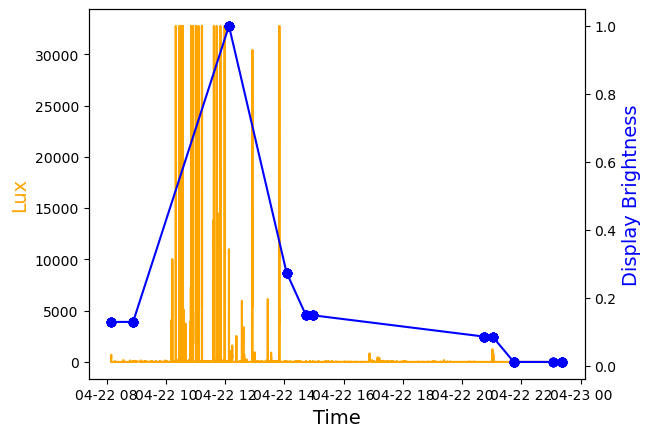

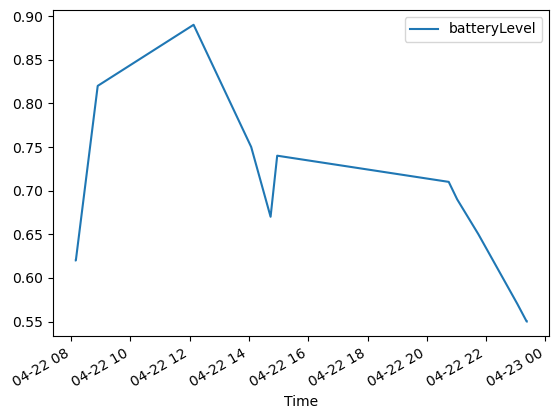

In [118]:
#light.plot(x= "Time", y = "lux")
#displayB.plot(x = "Time", y = "brightness")


fig = plt.subplot()
ax = plt.subplot()
ax.plot(light["Readable_Time"], light["lux"], color = "orange")
ax.set_xlabel("Time", fontsize = 14)
ax.set_ylabel("Lux", color = "orange", fontsize = 14)

ax2 = ax.twinx()
ax2.plot(displayB["Readable_Time"], displayB["brightness"], color = "blue", marker = "o")
ax2.set_ylabel("Display Brightness", color = "blue", fontsize = 14)

plt.show

battery.plot(x = "Time", y = "batteryLevel")

<h2>Beschleunigungsdaten ML Modell</h2>

In [119]:
def transform_data(df, action = ""):
    df["time"] = pd.to_datetime(df['time'], unit = 'ns')

    df = df.query("sensor == 'Accelerometer'")

    df["Readable_Time"] = df["time"]
    for i in range(0,len(df["time"])):
        df["Readable_Time"][i] = df["time"][i].to_pydatetime()

    df = df.drop(columns= df.columns.difference(["z", "y", "x", "Readable_Time"]))
    
    df["action"] = ""
    for i in range(0,len(df["Readable_Time"])):
        df["action"][i] = action
    return df

In [120]:
#Acceleration Preparation
jump = pd.read_json(path+ r"\WJR_Detection\Jump-2023-04-27_19-42-18.json")
walk = pd.read_json(path+ r"\WJR_Detection\Walk-2023-04-27_19-40-51.json")
stand = pd.read_json(path+ r"\WJR_Detection\Standing-2023-04-27_19-44-03.json")

jump_test = pd.read_json(path+ r"\WJR_Detection\Jump_Test-2023-04-28_10-00-59.json")
walk_test = pd.read_json(path+ r"\WJR_Detection\Walk_Test-2023-04-28_10-00-09.json")
stand_test = pd.read_json(path+ r"\WJR_Detection\Stand_Test-2023-04-28_09-59-11.json")

jump = transform_data(jump, "jump")
walk = transform_data(walk, "walk")
stand = transform_data(stand, "stand")
jump_test = transform_data(jump_test, "jump")
walk_test = transform_data(walk_test, "walk")
stand_test = transform_data(stand_test,"stand")
   
training = pd.concat([jump, walk, stand])
test = pd.concat([jump_test, walk_test, stand_test])

training

C:\Users\ReneJ\AppData\Local\Temp\ipykernel_6740\3009983350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Readable_Time"] = df["time"]
C:\Users\ReneJ\AppData\Local\Temp\ipykernel_6740\3009983350.py:8: UserWarning: Discarding nonzero nanoseconds in conversion.
  df["Readable_Time"][i] = df["time"][i].to_pydatetime()
C:\Users\ReneJ\AppData\Local\Temp\ipykernel_6740\3009983350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Readable_Time"][i] = df["time"][i].to_pydatetime()
C:\Users\ReneJ\AppData\Local\Temp\ipykernel_6740\3009983350.py:14: SettingW

z         y         x              Readable_Time action
0     0.000000  0.000000  0.000000 2023-04-27 19:42:18.277185   jump
1     0.535316  0.107452 -0.016647 2023-04-27 19:42:18.297204   jump
2     1.326960  0.094828 -0.065196 2023-04-27 19:42:18.315912   jump
3     1.473503  0.272366  0.114777 2023-04-27 19:42:18.337579   jump
4     1.516916  0.702033 -0.020280 2023-04-27 19:42:18.357751   jump
...        ...       ...       ...                        ...    ...
3046  0.350914 -0.337229  0.086209 2023-04-27 19:45:04.948845  stand
3047  0.332034 -0.287460  0.245507 2023-04-27 19:45:04.969078  stand
3048  0.178136 -0.188401  0.360048 2023-04-27 19:45:04.987785  stand
3049 -0.124652 -0.086617  0.011765 2023-04-27 19:45:05.009361  stand
3050 -0.118478 -0.144930 -0.139524 2023-04-27 19:45:05.029503  stand

[9353 rows x 5 columns]

In [121]:
features = ["x","y","z"]
predict = "action"

xTrain = training[features]
yTrain = training[predict]

#### Test 1 ####

xTest = test[features]
yTest = test[predict]

rfc = RandomForestClassifier(random_state= 5)
rfc = rfc.fit(xTrain,yTrain)

y_prediction = rfc.predict(xTest)


print("Test 1 : Accuracy is " + str(accuracy_score(yTest, y_prediction)*100))
#print(yTest)

compare = pd.DataFrame(y_prediction, columns= ["predicted_action"])


compare = compare.join(yTest)


print(compare)


Test 1 : Accuracy is 76.27937623544916
     predicted_action action
0                walk   jump
0                walk   walk
0                walk  stand
1                walk   jump
1                walk   walk
...               ...    ...
4548            stand    NaN
4549            stand    NaN
4550            stand    NaN
4551            stand    NaN
4552            stand    NaN

[7555 rows x 2 columns]


In [122]:
training.to_csv(path+ "\WJS_Training.csv")
test.to_csv(path+ "\WJS_Test.csv")
compare.to_csv(path + "\compare.csv")

<Axes: xlabel='Readable_Time'>

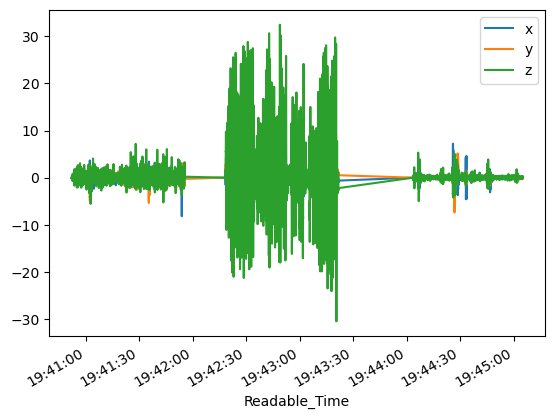

In [123]:
training.plot(x = "Readable_Time", y= ["x", "y", "z"])

<h1>Der heiße Scheiß! Timeseries Classification for Mobility!</h1>

<h2>Data Preprocessing</h2>

Das Vorgehen / meine Idee dazu, wie der Kram überhaupt funktionieren soll, hier fix dokumentiert:

Wir suchen uns aus den gesammelten Daten ~3 Sensoren aus, die wir für sinnvoll für die Klassifizierung halten (ich denke an Accelerometer, vom GPS das Speed Attribut und vlt noch der Lichtsensor). 

Wir reduzieren die Sensordaten einer Aufnahme dann auf diese Daten. Die Granularität der Daten ist egal, sie müssen auch nicht aufeinader gejoint werden. 

Für diese Daten werden Kennzahlen ausgerechnet, die Kennzahlen werden dann in einem Dataframe gespeichert und für das ML Modell zum trainieren verwendet.

<h3>Setup</h3>

Das steht am Anfang des Notebooks auch schon, aber ich hab keinen Bock, immer hoch und runter zu scrollen, daher importier' ich das hier nochmal

In [1]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import tsfresh
import pickle
import math
import os

In [4]:
sensors = ["Accelerometer","Location","Orientation"]
path = r"C:\Users\ReneJ\Desktop\Data"

<h3>Datenmassenvorverarbeitungsmethoden</h3>

Mit den beiden unten stehenden Methoden können wir super schnell und automatisiert Daten einlesen und umformatieren. Die Methoden machen beide da gleiche, die eine ist für CSVs, die andere für JSONs.

*transform_data_csv()* bekommt als Parameter einaml *folder* und *action*. *folder* ist der Dateipfad zum Ordner, in dem die ganzen Sensordaten im CSV Format liegen. Die Daten werden über den Dateipfad path(siehe oben) + folder (Parameter) + sensor (Einträge aus der *sensors* List, auch hier, siehe oben) gelsesen.

Bei *transform_data_json* gibt es den Parameter *folder* nicht, sondern den Parameter *subpath*. Im der JSON Datei sind alle Sensordaten enthalten und werden nicht gesplittet, anders als bei den CSVs, da ist jede CSV ein Sensor. Daher kann man hier einfach direkt den restlichen Dateipfad übergeben. Die JSON Dateien werden dann über den Pfad path (siehe oben) + subpath (der Parameter) eingelesen.

**Beide** Methoden haben den Parameter *action*. Dieser gibt an, zu welcher Aktivität die eingelesenen Daten gehören (Auto, Fahrrad, Laufen, Bus, Ubahn, Stehen)


Beide Methoden geben am Ende ein **Dictionary** zurück. Das Dictionary ist bei beiden Methoden im selben Format. Dieses Dictionary weist den Sensornamen (z.B. "Accelerometer") einen Dataframe zu. Außerdem speichert das Dictionary die Aktivität noch dazu. Jeder Dataframe hat eine eindeutige ID, diese hat den selben Wert wie *folder* oder *subpath*


In [11]:
def transform_data_csv(folder, action = ""):  
    datasets = {} #Ein Dictionary
    datasets["activity"] = action #Die Transportart wird im Dictionary gespeichert
    for sensor in sensors:
        #Dataframe wird eingelesen
        df = pd.read_csv(path + folder + "\\" + sensor + ".csv")

        #Zeittransformation
        #df["time"] = pd.to_datetime(df['time'], unit = 'ns')
        #df["Readable_Time"] = df["time"]
        #for i in range(0,len(df["time"])):
        #    df["Readable_Time"][i] = df["time"][i].to_pydatetime()
        df = df.drop(columns=["time"])
        df = df.dropna(axis = 1)

        #Datenschutz. Falls Location ein Sensor ist, wird davon nur die Speed verwendet
        if(sensor == "Location"):
            df = df.drop(columns= df.columns.difference(["speed", "Readable_Time", "seconds_elapsed"]))

        #df["activity"] = action #Darf hier nicht gesetzt werden, ist aber im Dicitonary vermerkt
        df["ID"] = folder
        
        #Dataframe wird dem Dictionay hinzugefügt
        datasets[sensor] = df
        
    return datasets



In [13]:
def transform_data_json(subPath, action = ""):
    datasets = {} #Ein Dictionary
    datasets["activity"] = action #Die Transportart wird im Dictionary gespeichert

    df = pd.read_json(path + subPath)

    #Zeittransformation
    #df["time"] = pd.to_datetime(df['time'], unit = 'ns')
    ##df["Readable_Time"] = df["time"]
    #for i in range(0,len(df["time"])):
    #    df["Readable_Time"][i] = df["time"][i].to_pydatetime()
    df = df.drop(columns=["time"])
    
    for sensor in sensors:
        temp = df.loc[df["sensor"] == sensor]
        temp = temp.dropna(axis = 1)
        temp = temp.drop(columns=["sensor"])
        #Datenschutz. Falls Location ein Sensor ist, wird davon nur die Speed verwendet
        if(sensor == "Location"):
            temp = temp.drop(columns= temp.columns.difference(["speed", "Readable_Time", "seconds_elapsed"]))

        #temp["activity"] = action #Darf hier nicht gesetzt werden, ist aber im Dicitonary vermerkt
        temp["ID"] = subPath
            
        #Dataframe wird dem Dictionary hinzugefügt
        datasets[sensor] = temp

    return datasets


<h3>Datentransformation mittels tsfresh</h3>
Die Codezeile

features = tsfresh.extract_features(Dictionary[Key zum Dataframe], column_id = "ID",column_sort='Readable_Time', 
                                       default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())

oder auch 

features = tsfresh.extract_features(Dictionary[Key zum Dataframe], column_id = "ID",column_sort='Readable_Time')

ist super duper wichtig. Mit ihr wird ein Dataframe zu einem neuen Dataframe umgewandelt. Der neue Dataframe besteht aus einer Zeile und n Spalten, wobei jede Spalte eine Metrik ist, die über die Ursprungsdataframe berechnet wurde. Das ist das Format, über das unser ML Modell trainieren wird. Dem neuen Dataframe muss man noch eine Spalte hinzufügen, in der steht, zu welcher Aktivität die Zeile gehört

___________________________________________________________________


Anyways, was zum Code hier unter mir: 

Die Daten, die wir gesammelt haben, sind in Dateien gespeichert (logischerweise, es sei denn, einer von euch hat auf Papier die ganze Zeit mitgeschrieben). Diese Dateien haben alle Dateipfade (vgl Eintrag zu den beiden Transformationsmethoden). Für jede Kategorie von Daten gibt es hier unter mir ein Dictionary, dieses Dictionary enthält einen string namens *folder_name* und einen Bezeichner als string namens *activity*. *activity* ist selbsterklärend. In *data* stehen die Dateipfade zu den Ordnern drinnen, die von den Transformationsmethoden gebraucht werden. Da CSVs und JSONs unterschiedlich verarbeitet werden, gibt es zu jeder Aktivität zwei Dictionaries, eins für CSVs, eins für JSONs.


In [14]:
car_csvs ={
    "folder_name" : r"\1. Car_CSV",
    "activity" :"car"
    }
bike_csvs = {
    "folder_name" : r"\2. Bike_CSV",
    "activity" : "bike"
    }
walk_csvs = {
    "folder_name" : r"\3. Walk_CSV",
    "activity" : "walk"
    }
bus_csvs = {
    "folder_name" : "",
    "activity" : "bus"
    }
subway_csvs = {
    "folder_name" : r"\4. Subway_CSV",
    "activity" : "subway"
    }  
idle_csvs = {
    "folder_name" : r"\5. Idle_CSV",
    "activity" : "idle"
    }
#-----------------------------
#"\JSON\.json"
car_jsons= {
    "folder_name" : r"\1. Car_JSON",
    "activity" : "car"
    }
bike_jsons = {
    "folder_name" : r"\2. Bike_JSON",
    "activity" : "bike"
    }
walk_jsons = {
    "folder_name" : r"\3. Walk_JSON",
    "activity" : "walk"
    }
bus_jsons = {
    "folder_name" : "",
    "activity" : "bus"
    }
subway_jsons = {
    "folder_name" : r"\4. Subway_JSON",
    "activity" : "subway"
    }
idle_jsons = {
    "folder_name" : r"\5. Idle_JSON",
    "activity" : "idle"
    }
roller_jsons = {
    "folder_name" : r"\6. Roller_JSON",
    "activity" : "roller"
}

data_csv = [car_csvs, bike_csvs, walk_csvs, subway_csvs, idle_csvs]
data_json = [car_jsons, bike_jsons, walk_jsons, subway_jsons, idle_jsons, roller_jsons]

<h3>Schritt 1</h3>

Alle Daten aus den beiden Listen voller Dictionaries werden mit den Methoden *transform_data_csv()* und *transform_data_json()* zu Dictionaries transformiert (siehe Beschreibung der Methoden). Diese Dicts werden in der Liste *transformed_data_list* gespeichert

In [17]:
transformed_data_list = []

for dict in data_csv:
    for folder in os.listdir(path + dict["folder_name"]):
        print(path + dict["folder_name"] + ": "+ folder) 
        transformed_data_list.append(transform_data_csv(dict["folder_name"] + "\\" + folder, dict["activity"]))
for dict in data_json:
    for file in os.listdir(path + dict["folder_name"]):
        print(path + dict["folder_name"] + ": "+ file) 
        transformed_data_list.append(transform_data_json(dict["folder_name"] + "\\" + file, dict["activity"]))

C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Auto-2023-05-14_15-05-18
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Auto-2023-05-14_16-22-43
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Car-2023-05-04_09-47-00
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Car-2023-05-09_13-33-11
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Car-2023-05-17_13-34-23
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Driving2005_1-2023-05-20_13-01-34
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Driving2005_2-2023-05-20_13-22-22
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Driving2205_1-2023-05-22_07-41-32
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Driving2205_2-2023-05-22_10-11-27
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Driving2205_3-2023-05-22_13-49-25
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: Driving2405-2023-05-24_07-46-07
C:\Users\ReneJ\Desktop\Data\1. Car_CSV: DrivingInnerorts2405-2023-05-24_19-45-02
C:\Users\ReneJ\Desktop\Data\2. Bike_CSV: Bike-2023-05-18_09-38-12
C:\Users\ReneJ\Desktop\Data\2. Bike_CSV: Bike-2023-05-23_10-17-41
C:\Users\ReneJ\Desktop\

<h3>Schitt 1.5</h3>

Die Daten liegen als eine Liste von Dictionaries vor, nun müssen die Daten noch aufgeteilt werden, damit der Datenbestand für das Training des ML Modells groß genug ist

In [18]:
length_of_time_series = 3

In [19]:
print(len(transformed_data_list))
print("______________________________________")
#(split_assist(transformed_data_list[0]["Accelerometer"], 4))
transformed_data_list

106
______________________________________


[{'activity': 'car',
  'Accelerometer':        seconds_elapsed         z         y         x  \
  0             0.120579  0.187233 -0.230438 -0.981605   
  1             0.130580  0.187155 -0.230365 -0.981626   
  2             0.140579  0.186420 -0.229663 -0.981994   
  3             0.150580  0.186162 -0.229411 -0.982192   
  4             0.160579  0.187061 -0.230272 -0.981698   
  ...                ...       ...       ...       ...   
  45394       454.055688 -0.100753 -0.060401  0.011753   
  45395       454.065687 -0.113615 -0.140901  0.073573   
  45396       454.075686 -0.024446 -0.170122  0.045379   
  45397       454.085684 -0.020646 -0.116217  0.037940   
  45398       454.095683 -0.026585 -0.114792  0.040215   
  
                                           ID  
  0      \1. Car_CSV\Auto-2023-05-14_15-05-18  
  1      \1. Car_CSV\Auto-2023-05-14_15-05-18  
  2      \1. Car_CSV\Auto-2023-05-14_15-05-18  
  3      \1. Car_CSV\Auto-2023-05-14_15-05-18  
  4      \1. Car_CSV\Au

In [20]:
splitted_list = []

for dict in transformed_data_list:
    amount_of_splits = 999999999999
    print(dict["Accelerometer"].iloc[-1]["ID"])
    #print(dict)
    for sensor in sensors:
        temp_aos = math.floor(dict[sensor]["seconds_elapsed"].iloc[-1]/(60 * length_of_time_series))
        if temp_aos < amount_of_splits:
            amount_of_splits = temp_aos
    print(amount_of_splits)
    if amount_of_splits == 999999999999 or amount_of_splits <= 1: #case 1: Something went wrong, we don't split. Case 2: The Timeseries is not long enough to be splited
        #Wenn der Datensatz zu kurz zum splitten ist, wird er nicht gesplittet, stattdessen wird er einfach als ganzes in die splitted_list gelegt
        splitted_list.append(dict)
    
    else:
        split_dict = {} #Dieses dictionary wird jedem Sensor eine Liste von aufgesplitteten DFs zuweisen
        split_dict["activity"] = dict["activity"]
        for sensor in sensors:
            splitted_dict_entry = np.array_split(dict[sensor], amount_of_splits) #Das ist jetzt ne Liste mit aufgeteilten Dataframes
            print(len(splitted_dict_entry))
            id_suffix = 0
            for df in splitted_dict_entry:
                df["ID"] = df["ID"] + "_" + str(id_suffix)
                id_suffix += 1
                
            split_dict[sensor] = splitted_dict_entry
        
        for i in range(0, amount_of_splits):
            sub_dict = {}
            sub_dict["activity"] = dict["activity"]
            for sensor in sensors:
                sub_dict[sensor] = split_dict[sensor][i]
            splitted_list.append(sub_dict)

     
splitted_list
                       
#x = transformed_data_list[0]["Accelerometer"]["seconds_elapsed"][len(transformed_data_list[0]["Accelerometer"]["seconds_elapsed"]) -1] /180
#y = transformed_data_list[0]["Brightness"]["seconds_elapsed"][len(transformed_data_list[0]["Brightness"]["seconds_elapsed"]) -1] /180
#math.floor(x) == math.floor(y)

#n = np.array_split(transformed_data_list[0]["Accelerometer"], x)
#i = 0
#for df in n:
#    df["ID"] = df["ID"] + "_" + str(i)
#    i += 1
#n

\1. Car_CSV\Auto-2023-05-14_15-05-18
2
2
2
2
\1. Car_CSV\Auto-2023-05-14_16-22-43
6
6
6
6
\1. Car_CSV\Car-2023-05-04_09-47-00
4
4
4
4
\1. Car_CSV\Car-2023-05-09_13-33-11
6
6
6
6
\1. Car_CSV\Car-2023-05-17_13-34-23
6
6
6
6
\1. Car_CSV\Driving2005_1-2023-05-20_13-01-34
1
\1. Car_CSV\Driving2005_2-2023-05-20_13-22-22
1
\1. Car_CSV\Driving2205_1-2023-05-22_07-41-32
7
7
7
7
\1. Car_CSV\Driving2205_2-2023-05-22_10-11-27
4
4
4
4
\1. Car_CSV\Driving2205_3-2023-05-22_13-49-25
6
6
6
6
\1. Car_CSV\Driving2405-2023-05-24_07-46-07
5
5
5
5
\1. Car_CSV\DrivingInnerorts2405-2023-05-24_19-45-02
3
3
3
3
\2. Bike_CSV\Bike-2023-05-18_09-38-12
20
20
20
20
\2. Bike_CSV\Bike-2023-05-23_10-17-41
17
17
17
17
\2. Bike_CSV\Bike_-2023-05-21_09-28-07
27
27
27
27
\2. Bike_CSV\Fahrrad1705-2023-05-17_13-45-07
4
4
4
4
\2. Bike_CSV\Fahrrad_-2023-05-21_14-44-56
27
27
27
27
\3. Walk_CSV\Laufen-2023-05-14_15-29-52
17
17
17
17
\3. Walk_CSV\Laufen-2023-05-20_15-46-45
21
21
21
21
\3. Walk_CSV\Walking2-2023-05-05_10-48-56
16


[{'activity': 'car',
  'Accelerometer':        seconds_elapsed         z         y         x  \
  0             0.120579  0.187233 -0.230438 -0.981605   
  1             0.130580  0.187155 -0.230365 -0.981626   
  2             0.140579  0.186420 -0.229663 -0.981994   
  3             0.150580  0.186162 -0.229411 -0.982192   
  4             0.160579  0.187061 -0.230272 -0.981698   
  ...                ...       ...       ...       ...   
  22695       227.066339 -0.050210 -0.240214 -0.166415   
  22696       227.076338 -0.136645 -0.211406 -0.074958   
  22697       227.086337 -0.211671 -0.142562  0.500646   
  22698       227.096336  0.119839  0.096554 -0.158943   
  22699       227.106334  0.176266  0.175957  0.889776   
  
                                             ID  
  0      \1. Car_CSV\Auto-2023-05-14_15-05-18_0  
  1      \1. Car_CSV\Auto-2023-05-14_15-05-18_0  
  2      \1. Car_CSV\Auto-2023-05-14_15-05-18_0  
  3      \1. Car_CSV\Auto-2023-05-14_15-05-18_0  
  4      \1. 

In [21]:
len(splitted_list)

600

<h3>Schritt 2</h3>

Die Daten werden mit tsfresh zu Kennzahlen umgewandelt. Für jedes Dictionary in der *transformed_data_list* wird für jeden Sensor aus der Sensor-Liste der in dem Dict gespeicherte Dataframe zu Kennzahlen mit tsfresh umgewandelt. Denn jedes dictionary hat für jeden Sensor aus der List einen Dataframe gespeichert. Die Kennzahlen werden als ein neuer Dataframe gespeichert, diesem Dataframe wird noch das Attribut "Activity" hinzugefügt, dieses speichert die Fortbewegungsart. Der Wert dafür kommt aus dem Dictionary.

Jeder Kennzahlendataframe hat genau eine Reihe.

In der Liste *final_form_data_list* wird jeder einzeilige Kennzahlen-Dataframe zusammen mit der Sensorart des Kennzahlen-Dataframes als ein Dictionary gespeichert.

In [22]:
final_form_data_list = []

for dict in splitted_list:
    for sensor in sensors:
        dict[sensor] = dict[sensor].drop(columns=["seconds_elapsed"])

        temp = tsfresh.extract_features(dict[sensor], column_id = "ID",
                                        default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
        temp["activity"] = dict["activity"]
        #temp["ID"] = dict[sensor]["ID"]
        final_form_data_list.append({"data" : temp, "sensor" : sensor})

Feature Extraction: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]


In [23]:
final_form_data_list[0]


{'data':                                         y__sum_values  y__median   y__mean  \
 \1. Car_CSV\Auto-2023-05-14_15-05-18_0     152.930811  -0.000812  0.006737   
 
                                         y__length  y__standard_deviation  \
 \1. Car_CSV\Auto-2023-05-14_15-05-18_0    22700.0               0.405154   
 
                                         y__variance  y__root_mean_square  \
 \1. Car_CSV\Auto-2023-05-14_15-05-18_0      0.16415              0.40521   
 
                                         y__maximum  y__absolute_maximum  \
 \1. Car_CSV\Auto-2023-05-14_15-05-18_0   21.262423            21.262423   
 
                                         y__minimum  ...  z__median  z__mean  \
 \1. Car_CSV\Auto-2023-05-14_15-05-18_0   -5.848703  ...   0.010648  0.02118   
 
                                         z__length  z__standard_deviation  \
 \1. Car_CSV\Auto-2023-05-14_15-05-18_0    22700.0               0.379395   
 
                                         z__vari

<h3>Schritt 3 </h3>

Nun werden die ganzen Dataframes mit den gleichen Sensoren zu jeweils einem kombiniert. Also wenn ich am Ende von Schritt 2 drei Accelerometer dfs, drei Location dfs und drei Orientation dfs hatte, hab ich am Ende von Schritt drei einen Accelerometer df, einen Location df und einen Orientation df mit jeweils drei Zeilen.

Diese Dataframes werden alle in der Liste *very_final_form_data_list* gespeichert. Ich weiß, meine Listennamen sind einfach top tier xD.

In [24]:
very_final_form_data_list = []

for sensor in sensors:
    temp_list = []
    for dict in final_form_data_list:
        if str(dict["sensor"]) == str(sensor):
            temp_list.append(dict["data"])
    concat_temp = pd.concat(temp_list)
    very_final_form_data_list.append(concat_temp)

<h3>Schritt 4</h3>

Der letzte Schritt zur Datentransformation und auch der trivialste. Die Dataframes aus der Liste *very_final_form_data_list* werden konkateniert. Da der Index von allen Dataframes hier die eindeutige ID ist, sollte man die einfach so ohne Probleme aneinanderlegen können, ohne großartige Join-Logik. 

Die Spalte "activity" ist nun n Mal vorhanden, die Duplikatspalten werden dann entfernt.

Sämtliche Daten aus den 12 Dictionaries von vor Schritt 1 sind nun transformiert in dem Dataframe *df_final* gespeichert.

In [25]:
#Join all the Dataframes to one Dataframe
df_final = pd.concat(very_final_form_data_list, axis = 1)

#Drop duplicate "activity" Columns
d = df_final.T.drop_duplicates().T
d["activity"]
df_final = df_final.drop(columns=["activity"])
df_final["activity"] = d["activity"]

#Final Dataframe with all the transformed data
df_final

y__sum_values  y__median  \
\1. Car_CSV\Auto-2023-05-14_15-05-18_0                 152.930811  -0.000812   
\1. Car_CSV\Auto-2023-05-14_15-05-18_1                 534.844393   0.007456   
\1. Car_CSV\Auto-2023-05-14_16-22-43_0                 350.179812   0.012382   
\1. Car_CSV\Auto-2023-05-14_16-22-43_1                  32.933727  -0.014779   
\1. Car_CSV\Auto-2023-05-14_16-22-43_2                 562.769506   0.015913   
...                                                           ...        ...   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_1    -628.246278  -0.025082   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_2   -1763.565310  -0.038642   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_3    -777.621426  -0.003352   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_4   -2033.298954  -0.008162   
\6. Roller_JSON\Roller_1-2023-05-02_12-36-25.json    -3023.592109  -0.030253   

                                                     y__mean  y__length  \
\1. Car_CSV\Auto-2023-05-14_15-05-18_0              0.006737    22700.0   
\1. Car_CSV\Auto-2023-05-14_15-05-18_1              0.023562    22699.0   
\1. Car_CSV\Auto-2023-05-14_16-22-43_0              0.017943    19516.0   
\1. Car_CSV\Auto-2023-05-14_16-22-43_1              0.001688    19516.0   
\1. Car_CSV\Auto-2023-05-14_16-22-43_2              0.028836    19516.0   
...                                                      ...        ...   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_1 -0.058540    10732.0   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_2 -0.164343    10731.0   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_3 -0.072465    10731.0   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_4 -0.189479    10731.0   
\6. Roller_JSON\Roller_1-2023-05-02_12-36-25.json  -0.163050    18544.0   

                                                    y__standard_deviation  \
\1. Car_CSV\Auto-2023-05-14_15-05-18_0                           0.405154   
\1. Car_CSV\Auto-2023-05-14_15-05-18_1                           0.414611   
\1. Car_CSV\Auto-2023-05-14_16-22-43_0                           0.363171   
\1. Car_CSV\Auto-2023-05-14_16-22-43_1                           0.266795   
\1. Car_CSV\Auto-2023-05-14_16-22-43_2                           0.301585   
...                                                                   ...   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_1               0.626940   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_2               1.052643   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_3               1.023218   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_4               1.624979   
\6. Roller_JSON\Roller_1-2023-05-02_12-36-25.json                0.969640   

                                                    y__variance  \
\1. Car_CSV\Auto-2023-05-14_15-05-18_0                 0.164150   
\1. Car_CSV\Auto-2023-05-14_15-05-18_1                 0.171902   
\1. Car_CSV\Auto-2023-05-14_16-22-43_0                 0.131893   
\1. Car_CSV\Auto-2023-05-14_16-22-43_1                 0.071180   
\1. Car_CSV\Auto-2023-05-14_16-22-43_2                 0.090953   
...                                                         ...   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_1     0.393054   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_2     1.108058   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_3     1.046975   
\6. Roller_JSON\Roller3-2023-05-03_20-12-44.json_4     2.640555   
\6. Roller_JSON\Roller_1-2023-05-02_12-36-25.json      0.940201   

                                                    y__root_mean_square  \
\1. Car_CSV\Auto-2023-05-14_15-05-18_0                         0.405210   
\1. Car_CSV\Auto-2023-05-14_15-05-18_1                         0.415280   
\1. Car_CSV\Auto-2023-05-14_16-22-43_0                         0.363614   
\1. Car_CSV\Auto-2023-05-14_16-22-43_1                         0.266801   
\1. Car_CSV\Auto-2023-05-14_16-22-43_2                         0.302960   
...       

In [26]:
print("Car: " + str(len(df_final.loc[df_final["activity"] == "car"])))
print("Walk: " + str(len(df_final.loc[df_final["activity"] == "walk"])))
print("Bike: " + str(len(df_final.loc[df_final["activity"] == "bike"])))
print("Subway: " + str(len(df_final.loc[df_final["activity"] == "subway"])))
print("Idle: " + str(len(df_final.loc[df_final["activity"] == "idle"])))
print("Roller: " + str(len(df_final.loc[df_final["activity"] == "roller"])))

Car: 106
Walk: 129
Bike: 103
Subway: 56
Idle: 123
Roller: 83


In [27]:
df_final.to_csv(path + "\\"+ "test.csv")

<h2>Machine Learning! Juhey</h2>

Ab hier geht der Machinelearning Teil los, was hier geschehen muss ist, ein Modell mit den Daten, die wir transformiert haben, zu trainieren. Dafür brauchen wir eine Unterscheidung zwischen Trainings- Test- und Validierungsdaten. 

**ToDo**: Hyperparameteroptimization anschauen

<h3>Machine Learning Importe</h3>

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [91]:
df_final = pd.read_csv(path + "\\" + "test.csv")
ml_eval = []
len(df_final)

600

In [92]:
df_final[df_final.isna().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, y__sum_values, y__median, y__mean, y__length, y__standard_deviation, y__variance, y__root_mean_square, y__maximum, y__absolute_maximum, y__minimum, x__sum_values, x__median, x__mean, x__length, x__standard_deviation, x__variance, x__root_mean_square, x__maximum, x__absolute_maximum, x__minimum, z__sum_values, z__median, z__mean, z__length, z__standard_deviation, z__variance, z__root_mean_square, z__maximum, z__absolute_maximum, z__minimum, speed__sum_values, speed__median, speed__mean, speed__length, speed__standard_deviation, speed__variance, speed__root_mean_square, speed__maximum, speed__absolute_maximum, speed__minimum, qz__sum_values, qz__median, qz__mean, qz__length, qz__standard_deviation, qz__variance, qz__root_mean_square, qz__maximum, qz__absolute_maximum, qz__minimum, qy__sum_values, qy__median, qy__mean, qy__length, qy__standard_deviation, qy__variance, qy__root_mean_square, qy__maximum, qy__absolute_maximum, qy__minimum, qx__sum_values, qx__median, qx__mean, qx__length, qx__standard_deviation, qx__variance, qx__root_mean_square, qx__maximum, qx__absolute_maximum, qx__minimum, qw__sum_values, qw__median, qw__mean, qw__length, qw__standard_deviation, qw__variance, qw__root_mean_square, qw__maximum, qw__absolute_maximum, qw__minimum, roll__sum_values, roll__median, roll__mean, roll__length, roll__standard_deviation, roll__variance, roll__root_mean_square, roll__maximum, roll__absolute_maximum, roll__minimum, pitch__sum_values, pitch__median, pitch__mean, pitch__length, pitch__standard_deviation, pitch__variance, pitch__root_mean_square, pitch__maximum, pitch__absolute_maximum, ...]
Index: []

[0 rows x 112 columns]

In [93]:
print(df_final.keys())

Index(['Unnamed: 0', 'y__sum_values', 'y__median', 'y__mean', 'y__length',
       'y__standard_deviation', 'y__variance', 'y__root_mean_square',
       'y__maximum', 'y__absolute_maximum',
       ...
       'yaw__median', 'yaw__mean', 'yaw__length', 'yaw__standard_deviation',
       'yaw__variance', 'yaw__root_mean_square', 'yaw__maximum',
       'yaw__absolute_maximum', 'yaw__minimum', 'activity'],
      dtype='object', length=112)


In [94]:
y = df_final["activity"]
x = df_final.drop(columns= ["activity", "Unnamed: 0"])
#x = df_final.drop(columns= "activity")

xTrain, xTest, yTrain, yTest =  train_test_split(x,y, test_size = 0.3, random_state=100)

In [95]:
print("Car: " + str(len(yTrain.loc[df_final["activity"] == "car"])))
print("Walk: " + str(len(yTrain.loc[df_final["activity"] == "walk"])))
print("Bike: " + str(len(yTrain.loc[df_final["activity"] == "bike"])))
print("Subway: " + str(len(yTrain.loc[df_final["activity"] == "subway"])))
print("Idle: " + str(len(yTrain.loc[df_final["activity"] == "idle"])))
print("Roller: " + str(len(yTrain.loc[df_final["activity"] == "roller"])))

Car: 77
Walk: 91
Bike: 73
Subway: 40
Idle: 82
Roller: 57


<h3>Support Vector Classification</h3>

<h4>Hyperparameter Tuning</h4>

In [96]:
gs = GridSearchCV(
    sk.svm.SVC(),
    param_grid={"kernel" : ["linear", "rbf", "poly", "sigmoid"], "C" : [0.1, 1, 10]},
    scoring= {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)},
    refit= "AUC",
    n_jobs= 16,
    return_train_score=True
)

gs.fit(xTrain, yTrain)
results = gs.cv_results_

results["params"][np.argmax(results["mean_test_Accuracy"])]

hpoSVC = sk.svm.SVC(C= results["params"][np.argmax(results["mean_test_Accuracy"])]["C"], kernel= results["params"][np.argmax(results["mean_test_Accuracy"])]["kernel"]) 
hpoSVC.fit(xTrain, yTrain)

ml_eval.append({"Model Name" : "HPO Support Vector Classifier", "Model" : hpoSVC, "Model Short": "SVC (hpo)"})

c:\Users\ReneJ\anaconda3\envs\ML4B\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\ReneJ\anaconda3\envs\ML4B\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


<h4>Default Settings</h4>

In [97]:
Support_Vector_Classifier = sk.svm.SVC()
Support_Vector_Classifier.fit(xTrain, yTrain)

ml_eval.append({"Model Name" : "Support Vector Classifier", "Model" : Support_Vector_Classifier, "Model Short": "SVC"})


<h3>Naive Bayes Classification</h3>

In [98]:
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(xTrain, yTrain)

ml_eval.append({"Model Name" : "Naive Bayes Classification", "Model" : GaussianNaiveBayes, "Model Short": "GNB"})

<h3>K Nearest Neighbour</h3>

<h4>Hyperparameter Tuning</h4>

In [99]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid= {"n_neighbors" : [2,5,7,10], "weights" : ["uniform", "distance"]},
    scoring= {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)},
    refit= "AUC",
    n_jobs= 16,
    return_train_score=True
)
gs.fit(xTrain, yTrain)
results = gs.cv_results_

print(results["params"][np.argmax(results["mean_test_Accuracy"])])

hpoKNN = KNeighborsClassifier(n_neighbors= results["params"][np.argmax(results["mean_test_Accuracy"])]["n_neighbors"], 
                              weights= results["params"][np.argmax(results["mean_test_Accuracy"])]["weights"]) 
hpoKNN.fit(xTrain, yTrain)
ml_eval.append({"Model Name" : "HPO K-Nearest Neighbour", "Model" : hpoKNN, "Model Short": "KNN (hpo)"})


{'n_neighbors': 2, 'weights': 'distance'}


c:\Users\ReneJ\anaconda3\envs\ML4B\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\ReneJ\anaconda3\envs\ML4B\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


<h4>Default Settings</h4>

In [100]:
knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)

ml_eval.append({"Model Name" : "K Nearest Neighbour", "Model" : knn, "Model Short": "KNN"})


<h3>Random Forest</h3>

<h4>Hyperparameter Tuning</h4>

In [101]:
gs = GridSearchCV(
    RandomForestClassifier(),
    param_grid= {"max_features" : ["sqrt", "log2"], "n_estimators" : [50, 75, 100, 150, 200], "min_samples_split" : range(2,403,20)},
    scoring= {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)},
    refit= "AUC",
    n_jobs= 16,
    return_train_score=True
)
gs.fit(xTrain, yTrain)
results = gs.cv_results_

print(results["params"][np.argmax(results["mean_test_Accuracy"])])

hpoRNF= RandomForestClassifier(max_features= results["params"][np.argmax(results["mean_test_Accuracy"])]["max_features"], 
                              n_estimators= results["params"][np.argmax(results["mean_test_Accuracy"])]["n_estimators"],
                              min_samples_split = results["params"][np.argmax(results["mean_test_Accuracy"])]["min_samples_split"]) 
hpoRNF.fit(xTrain, yTrain)
ml_eval.append({"Model Name" : "HPO Random Forest", "Model" : hpoRNF, "Model Short": "RNF (hpo)"})

c:\Users\ReneJ\anaconda3\envs\ML4B\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan

{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 75}


<h4>Default Settings</h4>

In [102]:
rnf = RandomForestClassifier()
rnf.fit(xTrain, yTrain)

ml_eval.append({"Model Name" : "Random Forest", "Model" : rnf, "Model Short": "RNF"})

<h3>Neural Network</h3>

In [103]:
gs = GridSearchCV(
    MLPClassifier(),
    param_grid= {"solver" : ["adam", "lbfgs", "sgd"], "max_iter": [100,150,200,250,300]},
    scoring= {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)},
    refit= "AUC",
    n_jobs= 16,
    return_train_score=True
)
gs.fit(xTrain, yTrain)
results = gs.cv_results_

print(results["params"][np.argmax(results["mean_test_Accuracy"])])

hpoMLPC= MLPClassifier(solver= results["params"][np.argmax(results["mean_test_Accuracy"])]["solver"], 
                              max_iter = results["params"][np.argmax(results["mean_test_Accuracy"])]["max_iter"]) 
hpoMLPC.fit(xTrain, yTrain)
ml_eval.append({"Model Name" : "HPO Multi-layer Perceptron", "Model" : hpoMLPC, "Model Short": "MLPC (hpo)"})

c:\Users\ReneJ\anaconda3\envs\ML4B\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\ReneJ\anaconda3\envs\ML4B\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'max_iter': 200, 'solver': 'adam'}


<h3>Evaluation</h3>

--- HPO Support Vector Classifier ---
Accuarcy score: 85.0
Recall score: 83.607308116045
Precision score: 85.41729606245735
Confusion Report: HPO Support Vector Classifier
              precision    recall  f1-score   support

        bike       0.84      0.87      0.85        30
         car       0.59      0.76      0.67        29
        idle       0.97      0.93      0.95        41
      roller       0.90      0.73      0.81        26
      subway       0.87      0.81      0.84        16
        walk       0.95      0.92      0.93        38

    accuracy                           0.85       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.86      0.85      0.85       180



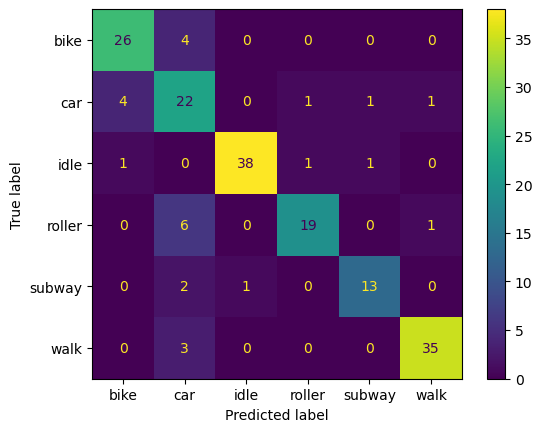

----------------------------------------
--- Support Vector Classifier ---
Accuarcy score: 76.11111111111111
Recall score: 68.92554027452881
Precision score: 64.11870446626544
Confusion Report: Support Vector Classifier
              precision    recall  f1-score   support

        bike       0.71      0.97      0.82        30
         car       0.62      0.52      0.57        29
        idle       0.71      0.95      0.81        41
      roller       0.92      0.88      0.90        26
      subway       0.00      0.00      0.00        16
        walk       0.89      0.82      0.85        38

    accuracy                           0.76       180
   macro avg       0.64      0.69      0.66       180
weighted avg       0.70      0.76      0.72       180



c:\Users\ReneJ\anaconda3\envs\ML4B\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ReneJ\anaconda3\envs\ML4B\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ReneJ\anaconda3\envs\ML4B\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ReneJ\anaconda3\

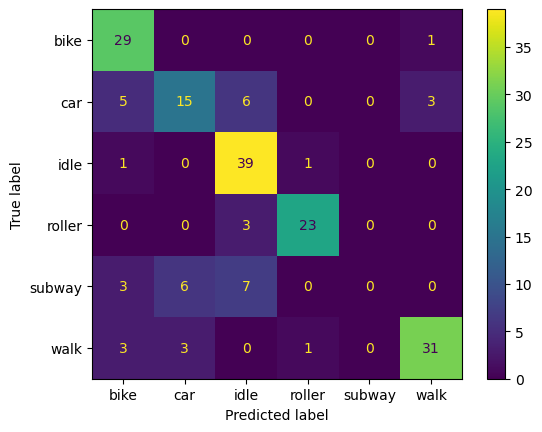

----------------------------------------
--- Naive Bayes Classification ---
Accuarcy score: 94.44444444444444
Recall score: 93.10918031611561
Precision score: 94.88085715255313
Confusion Report: Naive Bayes Classification
              precision    recall  f1-score   support

        bike       0.97      0.97      0.97        30
         car       1.00      0.90      0.95        29
        idle       0.98      0.98      0.98        41
      roller       0.96      0.96      0.96        26
      subway       0.93      0.81      0.87        16
        walk       0.86      0.97      0.91        38

    accuracy                           0.94       180
   macro avg       0.95      0.93      0.94       180
weighted avg       0.95      0.94      0.94       180



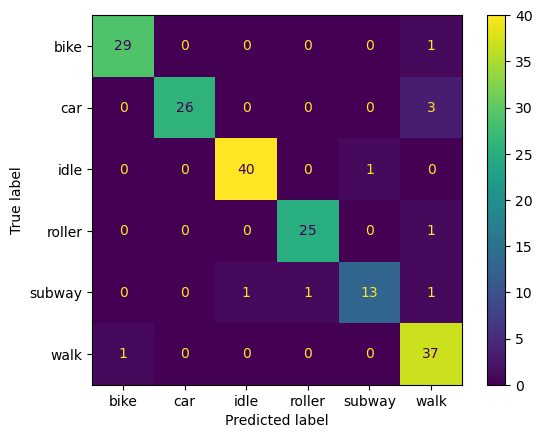

----------------------------------------
--- HPO K-Nearest Neighbour ---
Accuarcy score: 91.66666666666666
Recall score: 91.41311616417852
Precision score: 90.68136152346679
Confusion Report: HPO K-Nearest Neighbour
              precision    recall  f1-score   support

        bike       0.97      0.97      0.97        30
         car       0.87      0.90      0.88        29
        idle       0.95      0.90      0.92        41
      roller       0.96      0.92      0.94        26
      subway       0.78      0.88      0.82        16
        walk       0.92      0.92      0.92        38

    accuracy                           0.92       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.92      0.92      0.92       180



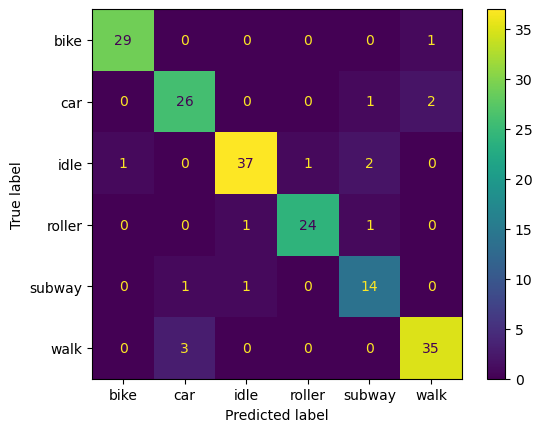

----------------------------------------
--- K Nearest Neighbour ---
Accuarcy score: 82.77777777777777
Recall score: 80.70687304754522
Precision score: 81.64714595749078
Confusion Report: K Nearest Neighbour
              precision    recall  f1-score   support

        bike       0.85      0.93      0.89        30
         car       0.66      0.66      0.66        29
        idle       0.88      0.90      0.89        41
      roller       0.91      0.77      0.83        26
      subway       0.73      0.69      0.71        16
        walk       0.87      0.89      0.88        38

    accuracy                           0.83       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.83      0.83      0.83       180



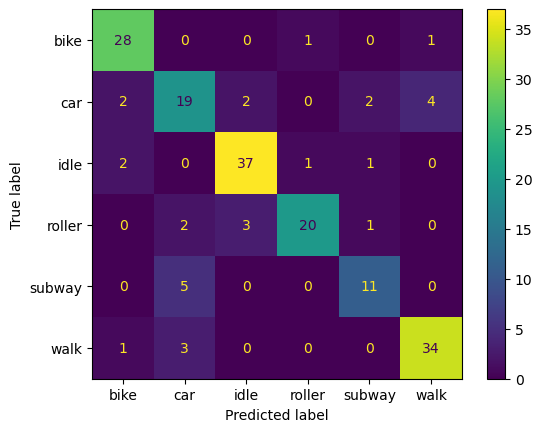

----------------------------------------
--- HPO Random Forest ---
Accuarcy score: 95.55555555555556
Recall score: 93.9351237842617
Precision score: 95.37350052692304
Confusion Report: HPO Random Forest
              precision    recall  f1-score   support

        bike       0.97      1.00      0.98        30
         car       0.96      0.86      0.91        29
        idle       0.98      1.00      0.99        41
      roller       0.96      0.96      0.96        26
      subway       0.93      0.81      0.87        16
        walk       0.93      1.00      0.96        38

    accuracy                           0.96       180
   macro avg       0.95      0.94      0.95       180
weighted avg       0.96      0.96      0.95       180



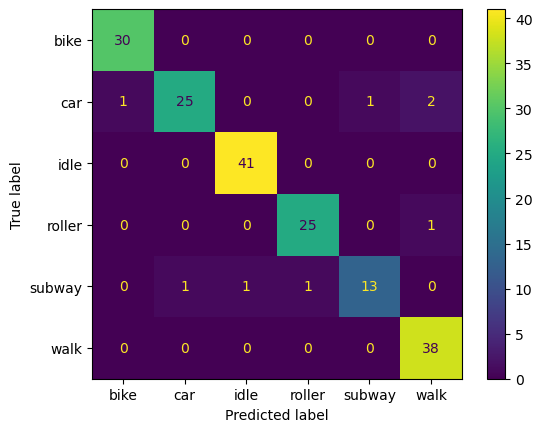

----------------------------------------
--- Random Forest ---
Accuarcy score: 96.11111111111111
Recall score: 94.97679045092838
Precision score: 96.09389124731376
Confusion Report: Random Forest
              precision    recall  f1-score   support

        bike       0.97      1.00      0.98        30
         car       0.96      0.86      0.91        29
        idle       0.98      1.00      0.99        41
      roller       1.00      0.96      0.98        26
      subway       0.93      0.88      0.90        16
        walk       0.93      1.00      0.96        38

    accuracy                           0.96       180
   macro avg       0.96      0.95      0.95       180
weighted avg       0.96      0.96      0.96       180



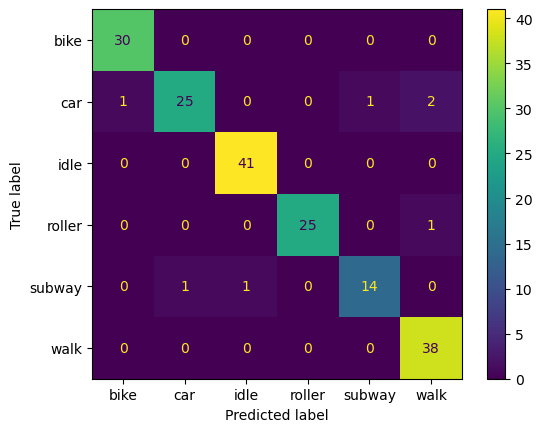

----------------------------------------
--- HPO Multi-layer Perceptron ---
Accuarcy score: 70.55555555555556
Recall score: 64.71147509011038
Precision score: 72.83127023521362
Confusion Report: HPO Multi-layer Perceptron
              precision    recall  f1-score   support

        bike       0.58      0.63      0.60        30
         car       0.46      0.72      0.56        29
        idle       1.00      0.85      0.92        41
      roller       0.95      0.73      0.83        26
      subway       0.67      0.12      0.21        16
        walk       0.72      0.82      0.77        38

    accuracy                           0.71       180
   macro avg       0.73      0.65      0.65       180
weighted avg       0.75      0.71      0.70       180



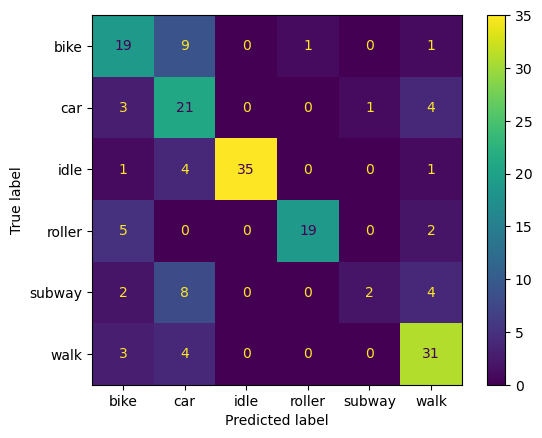

----------------------------------------


In [104]:
eval_df = pd.DataFrame(columns= ["model", "accuracy_score", "recall_score", "precision_score"])
i = 0

for entry in ml_eval:

    yPred = entry["Model"].predict(xTest)

    acc = accuracy_score(yTest, yPred) * 100
    cr = classification_report(yTest, yPred)
    rc = recall_score(yTest, yPred, average="macro") * 100
    pc = precision_score(yTest, yPred, average="macro") * 100
    cm = confusion_matrix(yTest, yPred)

    print("--- " + entry["Model Name"] + " ---")

    print("Accuarcy score: "+ str(acc))
    print("Recall score: " + str(rc))
    print("Precision score: " + str(pc))

    print("Confusion Report: " + entry["Model Name"])   
    print(cr)

    disp = ConfusionMatrixDisplay(cm, display_labels= entry["Model"].classes_)
    disp.plot()
    plt.show()

    print("----------------------------------------")

    entry["Classification Report"] = cr
    entry["Accuracy Score"] = acc
    entry["Recall Score"] = rc
    entry["Precision Score"] = pc

    eval_df.loc[i] = (entry["Model Short"], acc, rc, pc)
    i += 1



In [105]:
eval_df

model  accuracy_score  recall_score  precision_score
0   SVC (hpo)       85.000000     83.607308        85.417296
1         SVC       76.111111     68.925540        64.118704
2         GNB       94.444444     93.109180        94.880857
3   KNN (hpo)       91.666667     91.413116        90.681362
4         KNN       82.777778     80.706873        81.647146
5   RNF (hpo)       95.555556     93.935124        95.373501
6         RNF       96.111111     94.976790        96.093891
7  MLPC (hpo)       70.555556     64.711475        72.831270

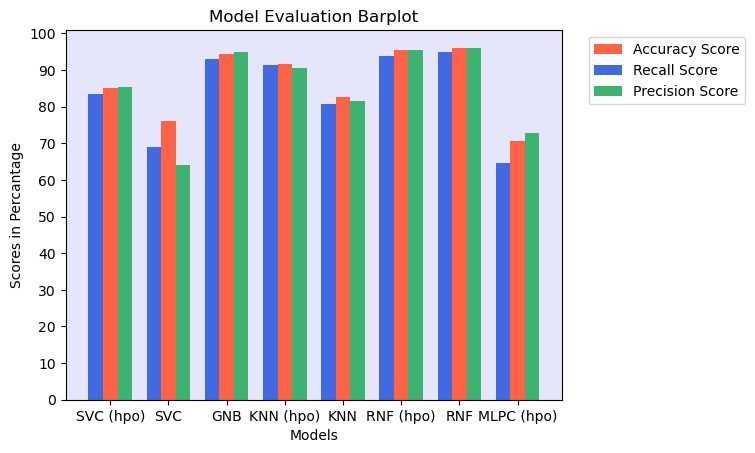

In [126]:
fig = plt.figure()
ax = plt.subplot()
x_axis = np.arange(len(eval_df["model"]))
width = .25

acc = ax.bar(x_axis, eval_df["accuracy_score"], width, label = "Accuracy Score", color = "tomato")
rc = ax.bar(x_axis - width, eval_df["recall_score"], width, label = "Recall Score", color = "royalblue")
pc = ax.bar(x_axis + width, eval_df["precision_score"], width, label = "Precision Score", color = "mediumseagreen")

ax.set_facecolor("lavender")

plt.xlabel("Models")
plt.ylabel("Scores in Percantage")
plt.title("Model Evaluation Barplot")

plt.xticks(x_axis, eval_df["model"])
plt.yticks(range(0,110, 10))

plt.legend((acc, rc, pc), ("Accuracy Score", "Recall Score", "Precision Score"), loc='upper left', bbox_to_anchor=(1.04, 1))